# The Cahart Four Factor Model #

### Using Relative Strenght to approach Momentum ###

In [116]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm

# Manipulate Files
import os

# Pretty Notation
from IPython.display import display, Math

In [117]:
# Get the important data for the Risk Free Rate

rfr = pd.read_csv(r"..\additional_data\rfr.csv")
rfr = rfr.set_index('Date')
rfr.index = pd.to_datetime(rfr.index, dayfirst=True)

# Get the important data for the S&P500

sp500 = pd.read_csv(r"..\additional_data\sp500.csv")
sp500 = sp500.set_index('Date')
sp500.index = pd.to_datetime(sp500.index)

# Get the data for the Stocks' Betas

betas_df = pd.read_csv(r"..\additional_data\betas.csv")
betas_df = betas_df.set_index('Date')
betas_df.index = pd.to_datetime(betas_df.index)

In [118]:
# Folder Path
folder_path = r"..\stocks"

# Dictionary to store the DataFrames
dataframes = {}

# List all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        # Full path to the file
        file_path = os.path.join(folder_path, file)
        
        # Read the Excel file
        df = pd.read_csv(file_path)
        df = df.set_index("Date")
        df.index = pd.to_datetime(df.index)

        df = df[['Adjusted_close', 'Market_cap_calculado']]

        df = df.rename(columns={
            'Adjusted_close':'adj_close',
            'Market_cap_calculado':'market_cap',
        })

        # Fill nans
        df['adj_close'] = df['adj_close'].interpolate(method='linear')
        df['market_cap'] = df['market_cap'].interpolate(method='linear')

        df = df.loc['2015-01-01':]

        df.dropna(inplace=True)
        
        if len(df) >= 2000:
            # File name without extension
            file_name = os.path.splitext(file)[0]
            
            # Guardar en el diccionario
            dataframes[file_name] = df
            print(f"File loaded: {file_name} ({len(df)} rows)")
        else:
            print(f"File skipped (less than 2000 rows after cleaning): {file}")

print(f"\nTotal files loaded: {len(dataframes)}")
print("Files loaded:", list(dataframes.keys()))

File loaded: A (2472 rows)
File loaded: AAPL (2472 rows)
File loaded: ABBV (2472 rows)
File skipped (less than 2000 rows after cleaning): ABNB.csv
File loaded: ABT (2472 rows)
File loaded: ADBE (2472 rows)
File loaded: ADI (2472 rows)
File loaded: ADM (2472 rows)
File loaded: ADP (2472 rows)
File loaded: ADSK (2472 rows)
File loaded: AEE (2472 rows)
File loaded: AEP (2472 rows)
File loaded: AES (2472 rows)
File loaded: AFL (2472 rows)
File loaded: AIG (2472 rows)
File loaded: AIZ (2472 rows)
File loaded: AJG (2472 rows)
File loaded: AKAM (2472 rows)
File loaded: ALB (2472 rows)
File loaded: ALGN (2472 rows)
File loaded: ALL (2472 rows)
File loaded: AMAT (2472 rows)
File loaded: AMD (2472 rows)
File loaded: AME (2472 rows)
File loaded: AMGN (2472 rows)
File loaded: AMP (2472 rows)
File loaded: AMT (2472 rows)
File loaded: AMZN (2472 rows)
File loaded: ANET (2472 rows)
File loaded: ANSS (2472 rows)
File loaded: AOS (2472 rows)
File loaded: APA (2472 rows)
File loaded: APD (2472 rows)
Fil

In [119]:
# Create a whole new dataframe that contains all the stocks betas

rets_series = []

for stock, df in dataframes.items():
    series = df['adj_close'].pct_change(1).rename(stock)  
    series = series.iloc[1:]
    rets_series.append(series)

# Concat
returns_df = pd.concat(rets_series, axis=1)
returns_df = returns_df.apply(lambda x: x.fillna(x.mean()), axis=0)

returns_df.dropna(inplace = True)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018738,-0.028172,-0.018819,0.000223,-0.004976,-0.018275,-0.034602,-0.000720,-0.014614,-0.010002,...,-0.013804,0.000000,-0.017020,-0.011351,-0.027362,-0.062237,-0.020318,0.037303,-0.014077,-0.006003
2015-01-06,-0.015578,0.000094,-0.004950,-0.011356,-0.020144,-0.023384,-0.019713,-0.008350,-0.019775,-0.011641,...,-0.017107,-0.001108,-0.021331,0.005321,-0.005316,-0.005881,-0.012274,-0.008477,-0.007205,-0.009756
2015-01-07,0.013272,0.014022,0.040417,0.008108,0.008223,0.010516,0.015031,0.008784,-0.002087,0.007778,...,0.016218,0.003050,0.029368,0.008635,0.010133,0.007887,0.033138,0.024870,0.025465,0.020643
2015-01-08,0.029975,0.038422,0.010459,0.020554,0.025383,0.017655,-0.014609,0.022940,0.024747,0.003528,...,0.019657,0.010779,0.012031,0.011599,0.016645,0.007546,0.017420,0.010617,0.021359,0.015399
2015-01-09,-0.007337,0.001072,-0.027355,-0.010508,-0.014743,-0.000730,-0.008530,-0.007162,-0.009014,-0.011206,...,-0.011453,-0.001367,0.012499,-0.012285,-0.001410,-0.018863,-0.001767,-0.014424,0.014613,0.001584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,-0.024130,-0.002622,0.011901,-0.007437,-0.009242,-0.004653,-0.007839,0.001478,-0.004486,-0.005327,...,-0.002959,-0.019820,0.010471,0.003941,0.005163,-0.008678,-0.004776,-0.008935,-0.001584,0.000317
2024-10-23,-0.003222,-0.021623,-0.004662,0.007664,-0.016386,0.009928,0.007003,-0.004462,-0.007574,0.016408,...,0.000140,0.006319,-0.017304,0.010050,-0.003563,0.002664,0.004949,0.004220,-0.010511,-0.002744
2024-10-24,-0.017590,-0.000823,0.009421,-0.004017,-0.004453,0.012475,0.007489,-0.002103,-0.001834,-0.002130,...,0.154343,0.008791,0.002252,0.012282,-0.005654,-0.008123,-0.006417,-0.006686,-0.016409,-0.039632


In [120]:
# Create a whole new dataframe that contains all the stocks betas

mktcap_series = []

for stock, df in dataframes.items():
    series = df['market_cap'].rename(stock)  
    series = series.iloc[1:]
    mktcap_series.append(series)

# Concat
mktcap_df = pd.concat(mktcap_series, axis=1)
mktcap_df = mktcap_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Drop nans
mktcap_df.dropna(inplace = True)

# Apply Logs and EMA (maybe)
mktcap_df = np.log(mktcap_df)
mktcap_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,23.310518,27.158261,25.354579,24.963717,24.303701,23.554108,24.216559,24.414648,23.314509,23.125296,...,22.020014,23.586216,23.406606,23.616339,26.669565,22.608591,23.826613,23.684291,22.100188,23.794869
2015-01-06,23.294818,27.158355,25.349617,24.952296,24.283351,23.530446,24.196649,24.406262,23.294536,23.113587,...,22.002759,23.585107,23.385044,23.621646,26.664234,22.602693,23.814263,23.675778,22.092957,23.785065
2015-01-07,23.308003,27.172280,25.389238,24.960372,24.291541,23.540908,24.211569,24.415008,23.292447,23.121335,...,22.018847,23.588152,23.413990,23.630244,26.674316,22.610549,23.846864,23.700344,22.118103,23.805498
2015-01-08,23.337537,27.209982,25.399643,24.980717,24.316607,23.558408,24.196852,24.437689,23.316893,23.124857,...,22.038314,23.598874,23.425949,23.641776,26.690823,22.618067,23.864134,23.710905,22.139237,23.820779
2015-01-09,23.330173,27.211054,25.371907,24.970154,24.301754,23.557678,24.188286,24.430501,23.307838,23.113587,...,22.026795,23.597506,23.438370,23.629415,26.689413,22.599024,23.862366,23.696376,22.153745,23.822363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,24.416692,28.909263,26.532427,26.031113,26.123266,25.437491,24.075587,25.501514,24.850774,23.876616,...,23.757865,23.859889,23.127566,24.292551,27.007904,24.186178,24.346917,23.784920,23.677344,25.177636
2024-10-23,24.416692,28.887403,26.527754,26.031113,26.106744,25.447370,24.082566,25.497042,24.843171,23.892891,...,23.758005,23.866188,23.110111,24.302551,27.004335,24.188839,24.351854,23.789132,23.666778,25.174888
2024-10-24,24.416692,28.886579,26.537131,26.031113,26.102281,25.459768,24.090027,25.494936,24.841336,23.890759,...,23.900158,23.873894,23.112361,24.314759,26.998665,24.180682,24.345417,23.782424,23.650233,25.134450


In [121]:
# Create the Weights function
def wexp(N, half_life):
    c = np.log(0.5)/half_life
    n = np.array(range(N))
    w = np.exp(c*n)
    return np.flip(w/np.sum(w))

def n_days_nonmiss(returns, tiny_ret=1e-6):
    ix_ret_tiny = np.abs(returns) <= tiny_ret
    return np.sum(~ix_ret_tiny, axis=0)

def calc_rstr(returns, half_life=126, min_obs=100, tiny_ret=1e-6):
    rstr = np.log(1.+returns)
    if half_life == 0:
        weights = np.ones_like(rstr)
    else:
        weights = len(returns) * np.asmatrix(wexp(len(returns),half_life)).T
    rstr = np.sum(rstr * weights)
    idx = n_days_nonmiss(returns) < min_obs
    rstr.where(~idx, other=np.nan, inplace=True)
    df = pd.Series(rstr)
    df.name = returns.index[-1]
    return df

def rolling_calc_rstr(
        returns,
        window_size=252,
        half_life=126,
        min_obs=100
):
    rolling_results = []
    range_to_iter = range(len(returns) - window_size + 1)
    for i in range_to_iter:
        window_returns = returns.iloc[i:i + window_size]
        rs_i = calc_rstr(
            returns=window_returns,
            half_life=half_life,
            min_obs=min_obs
        )

        rolling_results.append(rs_i)

    return pd.concat(rolling_results, axis=1)


In [122]:
# Create a whole new dataframe that contains all the stocks betas
relative_strenght_long = rolling_calc_rstr(
    returns_df,
    window_size=252,
    half_life=126
).T

relative_strenght_short = rolling_calc_rstr(
    returns_df,
    window_size=28,
    half_life=14,
    min_obs=13
).T

C:\Users\edgar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\edgar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [123]:
relative_strenght = (relative_strenght_long - relative_strenght_short).dropna()

relative_strenght

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2016-01-04,0.055415,-0.047044,-0.116394,-0.015036,0.266064,-0.020984,-0.456358,0.043489,0.158018,0.025280,...,0.173835,-0.059800,-0.782277,0.030988,-0.118682,0.048675,-0.098073,-0.098589,-0.268700,0.073932
2016-01-05,0.072157,-0.046106,-0.108165,-0.024851,0.267210,-0.037625,-0.426217,0.040338,0.178058,0.021602,...,0.176123,-0.065922,-0.759351,0.032791,-0.103362,0.076675,-0.089730,-0.118096,-0.265295,0.073651
2016-01-06,0.085636,-0.049397,-0.106990,-0.023431,0.274461,-0.004502,-0.423820,0.036871,0.186147,0.026465,...,0.184055,-0.065821,-0.721535,0.033513,-0.092396,0.075742,-0.086998,-0.115793,-0.256437,0.078996
2016-01-07,0.084104,-0.068889,-0.132487,-0.032606,0.265818,-0.020059,-0.425242,0.025885,0.179157,0.023252,...,0.168170,-0.071372,-0.739224,0.028193,-0.102277,0.070090,-0.103271,-0.128120,-0.276148,0.069765
2016-01-08,0.072172,-0.097691,-0.141193,-0.048417,0.251289,-0.036861,-0.419685,0.010330,0.159301,0.023882,...,0.154002,-0.082335,-0.757883,0.025988,-0.112884,0.060189,-0.113222,-0.133439,-0.304456,0.061802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,0.154651,0.284189,0.264291,0.161394,-0.034556,0.235620,-0.157653,0.224268,0.292551,0.210827,...,-0.244816,0.095918,0.029950,0.168733,0.080603,0.226198,0.057637,-0.103290,0.483922,0.146960
2024-10-23,0.152176,0.283787,0.266072,0.164143,-0.079433,0.249270,-0.152084,0.224651,0.309516,0.222067,...,-0.249892,0.114498,0.037327,0.168162,0.088562,0.234048,0.062345,-0.101133,0.482271,0.147714
2024-10-24,0.165521,0.269418,0.261429,0.173367,-0.095849,0.240894,-0.135486,0.228312,0.305232,0.223420,...,-0.250281,0.111092,0.036799,0.165381,0.100314,0.239154,0.060161,-0.095068,0.487467,0.149903
2024-10-25,0.168915,0.276842,0.256255,0.179893,-0.088753,0.259329,-0.147662,0.274161,0.315802,0.218266,...,-0.229500,0.123891,0.059899,0.162017,0.105629,0.245763,0.049973,-0.096167,0.514202,0.157286


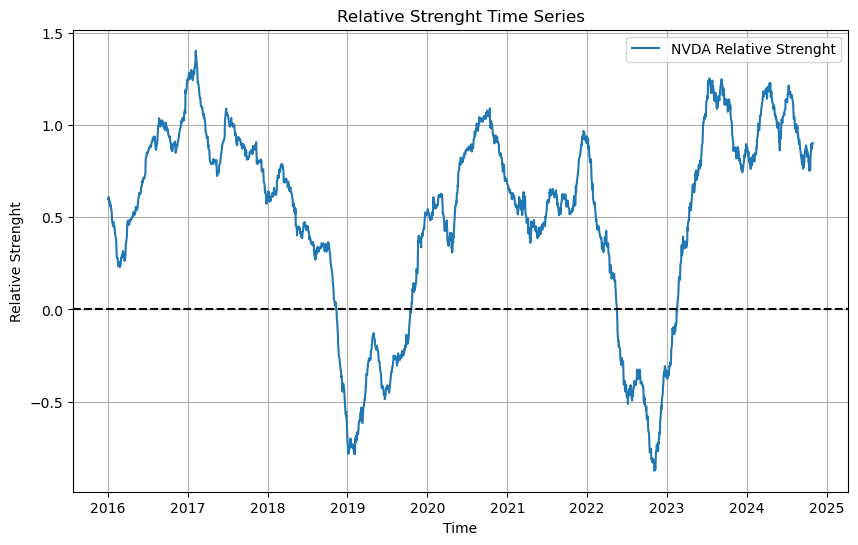

In [124]:
# Create Plot

ticker = 'NVDA'

plt.figure(figsize=(10, 6))
plt.plot(relative_strenght[ticker], label=f'{ticker} Relative Strenght', alpha=1)
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Relative Strenght Time Series')
plt.xlabel('Time')
plt.ylabel('Relative Strenght')
plt.legend()
plt.grid()

# Show
plt.show()

In [125]:
# Store the Data

relative_strenght.to_csv(r"..\additional_data\momentum.csv")

In [126]:
# Checar que dice Cahart al respecto >:
# Sharpe Ratio decay
# Fuerza de la señal dura un mes, entonces podemos hacer rebalanceo mensual para clasificar winners y losers pipipi
# Podríamos ver otros factores

### Calculate the Momentum Portfolios ###

In [128]:
# Define the Decomposition Function
def momentum_decomposition(
    target_df, 
    mktcap_df, 
    momentum_df
):
    # Common Indexes
    common_index = target_df.index.intersection(momentum_df.index).intersection(mktcap_df.index)
    
    # Reindex
    target_df = target_df.loc[common_index]
    mktcap_df = mktcap_df.loc[common_index]
    momentum_df = momentum_df.loc[common_index]

    # Initialize lists to store portfolio returns
    winner_list, neutral_list, loser_list = [], [], []
    
    # Get unique quarters
    months = sorted(set([date.to_period('M') for date in common_index]))
    
    # Dictionary to store quarterly classifications and weights
    monthly_classifications = {}

    for month in months:
        # Select only the last available date of the quarter
        month_dates = [date for date in common_index if date.to_period('M') == month]
        rebalance_date = month_dates[-1]  # Last day of the quarter
        
        # Momentum Factor for rebalance date
        momentum_factor_df = pd.DataFrame([momentum_df.loc[rebalance_date]], index=['mom']).T.dropna()
        
        # Classify stocks into Low, Neutral, and High based on quantiles
        lower = momentum_factor_df['mom'].quantile(0.3)
        upper = momentum_factor_df['mom'].quantile(0.7)

        momentum_factor_df['momentum_class'] = 'neutral'
        momentum_factor_df.loc[momentum_factor_df['mom'] <= lower, 'momentum_class'] = 'loser'
        momentum_factor_df.loc[momentum_factor_df['mom'] >= upper, 'momentum_class'] = 'winner'
        
        # Market cap data
        market_caps_df = pd.DataFrame([mktcap_df.loc[rebalance_date]], index=['mkt_cap']).T
        
        # Assign market caps to value classes
        loser_mktcap_df = market_caps_df.loc[momentum_factor_df[momentum_factor_df['momentum_class'] == 'loser'].index]
        neutral_mktcap_df = market_caps_df.loc[momentum_factor_df[momentum_factor_df['momentum_class'] == 'neutral'].index]
        winner_mktcap_df = market_caps_df.loc[momentum_factor_df[momentum_factor_df['momentum_class'] == 'winner'].index]
        
        # Compute weights
        loser_weights = loser_mktcap_df['mkt_cap'] / loser_mktcap_df['mkt_cap'].sum()
        neutral_weights = neutral_mktcap_df['mkt_cap'] / neutral_mktcap_df['mkt_cap'].sum()
        winner_weights = winner_mktcap_df['mkt_cap'] / winner_mktcap_df['mkt_cap'].sum()
        
        # Store classifications and weights
        monthly_classifications[month] = {
            "loser": loser_weights,
            "neutral": neutral_weights,
            "winner": winner_weights
        }
    
    # Iterate over all available dates to compute daily returns
    for date in common_index:
        month_key = date.to_period('M')  # Get quarter of the current date
        
        if month_key in monthly_classifications:
            # Retrieve stored classification and weights
            loser_weights = monthly_classifications[month_key]["loser"]
            neutral_weights = monthly_classifications[month_key]["neutral"]
            winner_weights = monthly_classifications[month_key]["winner"]
            
            # Retrieve daily returns
            target = pd.DataFrame([target_df.loc[date]], index=['returns']).T
            
            loser_returns = target.reindex(loser_weights.index).dropna()
            neutral_returns = target.reindex(neutral_weights.index).dropna()
            winner_returns = target.reindex(winner_weights.index).dropna()
            
            # Compute portfolio returns
            loser_result = loser_weights.reindex(loser_returns.index).T @ loser_returns
            neutral_result = neutral_weights.reindex(neutral_returns.index).T @ neutral_returns
            winner_result = winner_weights.reindex(winner_returns.index).T @ winner_returns
            
            # Store results
            loser_list.append(loser_result.values[0] if not loser_result.empty else None)
            neutral_list.append(neutral_result.values[0] if not neutral_result.empty else None)
            winner_list.append(winner_result.values[0] if not winner_result.empty else None)

    # Create final DataFrame
    momentum_portfolios = pd.DataFrame({
        'winner': winner_list,
        'neutral': neutral_list,
        'loser': loser_list
    }, index=common_index)
    
    return momentum_portfolios

In [129]:
# Create DataFrames

momentum_portfolios_returns = momentum_decomposition(returns_df, mktcap_df, relative_strenght)

momentum_portfolios_returns

,winner,neutral,loser
2016-01-04,-0.018040,-0.017202,-0.009452
2016-01-05,0.007570,0.002960,-0.001961
2016-01-06,-0.006064,-0.013236,-0.027606
2016-01-07,-0.019930,-0.021795,-0.031868
2016-01-08,-0.010286,-0.012704,-0.009796
...,...,...,...
2024-10-22,-0.005271,-0.002377,-0.006576
2024-10-23,-0.001540,-0.001675,-0.007063
2024-10-24,0.000264,-0.002276,0.003739
2024-10-25,-0.007374,-0.004828,-0.001901


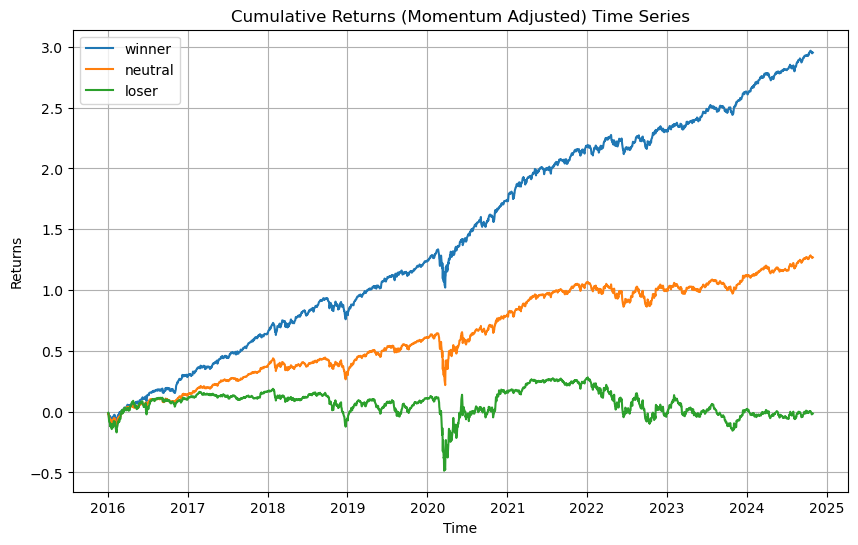

In [130]:
# Create Plot

plt.figure(figsize=(10, 6))
plt.plot(momentum_portfolios_returns.cumsum(), label=momentum_portfolios_returns.columns, alpha=1)

# Config
plt.title('Cumulative Returns (Momentum Adjusted) Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [131]:
# Create DataFrames

momentum_portfolios_betas = momentum_decomposition(betas_df, mktcap_df, relative_strenght)

momentum_portfolios_betas

,winner,neutral,loser
2016-01-08,0.917747,0.945605,1.065780
2016-01-11,0.915763,0.947143,1.067607
2016-01-12,0.914955,0.946831,1.066839
2016-01-13,0.915051,0.946982,1.062228
2016-01-14,0.921031,0.946760,1.062949
...,...,...,...
2024-10-22,0.865084,0.680912,0.704479
2024-10-23,0.864771,0.679737,0.704575
2024-10-24,0.856203,0.673954,0.703996
2024-10-25,0.855594,0.673021,0.703904


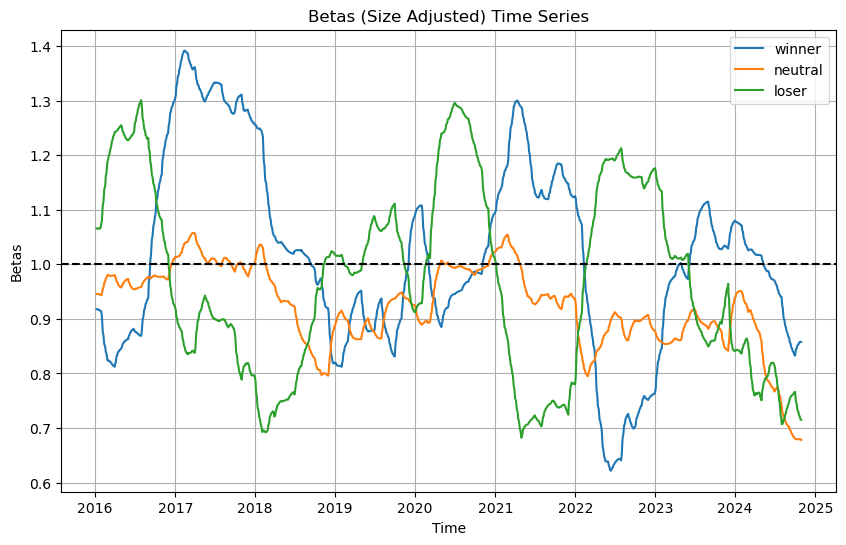

In [132]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momentum_portfolios_betas.ewm(span=21, adjust = False).mean(), label=momentum_portfolios_betas.columns, alpha=1)
plt.axhline(y=1, color='black', linestyle='dashed')

# Config
plt.title('Betas (Size Adjusted) Time Series')
plt.xlabel('Time')
plt.ylabel('Betas')
plt.legend()
plt.grid()

# Show
plt.show()

In [133]:
# Create the data
daily_rfr = (((1 + (rfr['risk_free_rate'].div(100)))**(1/360)) - 1)
benchmark_returns = sp500['sp_500'].pct_change(1)

# Create the Excess Returns
market_excess_returns = benchmark_returns - daily_rfr

In [134]:
# Create the regression dataframe
momentum_regression_df = pd.DataFrame(index = momentum_portfolios_returns.index)

momentum_regression_df['winners_excess_returns'] = momentum_portfolios_returns['winner'] - daily_rfr
momentum_regression_df['losers_excess_returns'] = momentum_portfolios_returns['loser'] - daily_rfr
momentum_regression_df['market_excess_returns'] = market_excess_returns
momentum_regression_df.dropna(inplace = True)

momentum_regression_df

,winners_excess_returns,losers_excess_returns,market_excess_returns
2016-01-04,-0.018102,-0.009513,-0.015365
2016-01-05,0.007509,-0.002023,0.001950
2016-01-06,-0.006124,-0.027666,-0.013175
2016-01-07,-0.019989,-0.031928,-0.023760
2016-01-08,-0.010345,-0.009854,-0.010897
...,...,...,...
2024-10-22,-0.005385,-0.006691,-0.000589
2024-10-23,-0.001655,-0.007179,-0.009307
2024-10-24,0.000150,0.003624,0.002031
2024-10-25,-0.007490,-0.002017,-0.000415


In [135]:
# Calculate the Beta for the Winner Portfolio

y = momentum_regression_df['winners_excess_returns']

x = momentum_regression_df['market_excess_returns']
x = sm.add_constant(x)

# Calculate Weights
window = len(y)
weights = window * wexp(window, window/2)

#Model specification
model = sm.WLS(
    y, 
    x,
    missing='drop',
    weights=weights,
    )   
     
#the results of the model
results = model.fit() 
    
#here we check the summary
print(results.summary())

                              WLS Regression Results                              
Dep. Variable:     winners_excess_returns   R-squared:                       0.830
Model:                                WLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                 1.076e+04
Date:                    Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                            19:23:11   Log-Likelihood:                 8622.8
No. Observations:                    2205   AIC:                        -1.724e+04
Df Residuals:                        2203   BIC:                        -1.723e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [136]:
# Calculate the Beta for the Loser Portfolio

y = momentum_regression_df['losers_excess_returns']

x = momentum_regression_df['market_excess_returns']
x = sm.add_constant(x)

# Calculate Weights
window = len(y)
weights = window * wexp(window, window/2)

#Model specification
model = sm.WLS(
    y, 
    x,
    missing='drop',
    weights=weights,
    )   
     
#the results of the model
results = model.fit() 
    
#here we check the summary
print(results.summary())

                              WLS Regression Results                             
Dep. Variable:     losers_excess_returns   R-squared:                       0.720
Model:                               WLS   Adj. R-squared:                  0.720
Method:                    Least Squares   F-statistic:                     5666.
Date:                   Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                           19:23:11   Log-Likelihood:                 7476.3
No. Observations:                   2205   AIC:                        -1.495e+04
Df Residuals:                       2203   BIC:                        -1.494e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [137]:
# Calculate the WML Premium

momentum_regression_df['WML'] = momentum_portfolios_returns['winner'] - momentum_portfolios_returns['loser']

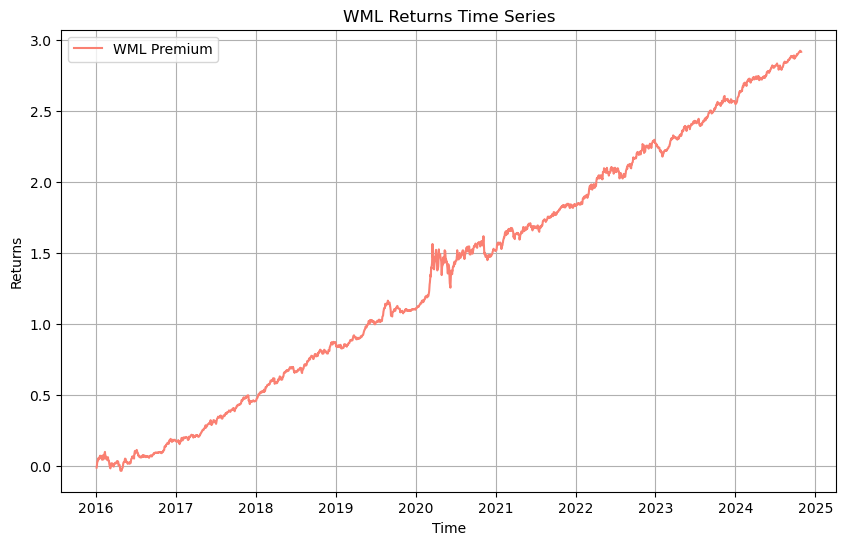

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(momentum_regression_df['WML'].cumsum(), label='WML Premium', color = 'salmon', alpha=1)

# Config
plt.title('WML Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [139]:
# Check the Correlation with the Market

momentum_regression_df['WML'].corr(momentum_regression_df['market_excess_returns'])

-0.21236523900581983

In [140]:
# Calculate the Beta for the WML premium

y = momentum_regression_df['WML']

x = momentum_regression_df['market_excess_returns']
x = sm.add_constant(x)

# Calculate Weights
window = len(y)
weights = window * wexp(window, window/2)

#Model specification
model = sm.WLS(
    y, 
    x,
    missing='drop',
    weights=weights,
    )   
     
#the results of the model
results = model.fit() 
    
#here we check the summary
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                    WML   R-squared:                       0.045
Model:                            WLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.21e-23
Time:                        19:23:11   Log-Likelihood:                 6828.8
No. Observations:                2205   AIC:                        -1.365e+04
Df Residuals:                    2203   BIC:                        -1.364e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [141]:
# Store the Premium

momentum_regression_df['WML'].to_csv(r"..\additional_data\WML.csv")